    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot 

In [1]:
#load data tensorflow fashion_mnist data
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

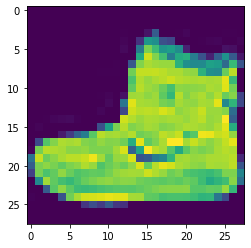

In [3]:
#plot first image of train data set
plt.imshow(x_train[0])

In [4]:
x_train.max()

255

In [5]:
x_test.max()

255

In [6]:
#normalize x_train and x_test by dividing 255
x_train = x_train / 255
x_test = x_test / 255

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
#reshape X arrays to 4 dims of the single channel. 
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
#convert continiuos label to to categorical label 
y_cat_train = to_categorical(y=y_train, num_classes=10)

In [14]:
#convert continiuos label to to categorical label
y_cat_test = to_categorical(y=y_test, num_classes=10)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [16]:
#create Sequential model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1) )) #CNN layer
model.add(MaxPool2D(pool_size=(2,2))) #Pooling layer


model.add(Flatten()) # FLATTEN IMAGES FROM 28 by 28 to 28x28 = 764 BEFORE FINAL LAYER

model.add(Dense(units=128, activation='relu')) # 256 Neurons in hidden layer 
model.add(Dropout(rate=0.2))


model.add(Dense(units=10, activation='softmax')) #output layer is the classifier 10 possible classes

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
#create early stop object to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [20]:
#train model
model.fit(x_train, y_cat_train, validation_data=(x_test, y_cat_test), callbacks=[early_stop], epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 15s 244us/sample - loss: 0.4267 - accuracy: 0.8495 - val_loss: 0.3488 - val_accuracy: 0.8754
Epoch 2/50
60000/60000 [==============================] - 14s 238us/sample - loss: 0.3034 - accuracy: 0.8906 - val_loss: 0.3201 - val_accuracy: 0.8823
Epoch 3/50
60000/60000 [==============================] - 14s 236us/sample - loss: 0.2690 - accuracy: 0.9040 - val_loss: 0.3041 - val_accuracy: 0.8918
Epoch 4/50
60000/60000 [==============================] - 14s 240us/sample - loss: 0.2462 - accuracy: 0.9126 - val_loss: 0.2812 - val_accuracy: 0.9028
Epoch 5/50
60000/60000 [==============================] - 15s 243us/sample - loss: 0.2297 - accuracy: 0.9192 - val_loss: 0.3266 - val_accuracy: 0.8908
Epoch 6/50
60000/60000 [==============================] - 15s 243us/sample - loss: 0.2177 - accuracy: 0.9226 - val_loss: 0.3094 - val_accuracy: 0.8983
Epoch 7/50
60000/60000 [====================

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [22]:
#create DF with model history
model_loss = pd.DataFrame(model.history.history)

In [23]:
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.426690,0.849467,0.348801,0.8754
1,0.303384,0.890600,0.320115,0.8823
2,0.269010,0.903983,0.304081,0.8918
3,0.246161,0.912600,0.281161,0.9028
4,0.229676,0.919183,0.326638,0.8908


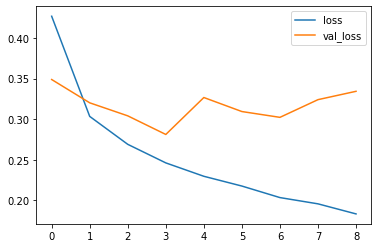

In [24]:
model_loss[['loss','val_loss']].plot()

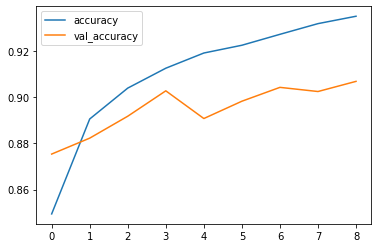

In [25]:
model_loss[['accuracy', 'val_accuracy']].plot()

In [28]:
predictions = model.predict_classes(x_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.83      0.86      1000
           3       0.90      0.94      0.92      1000
           4       0.86      0.84      0.85      1000
           5       0.98      0.96      0.97      1000
           6       0.74      0.74      0.74      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



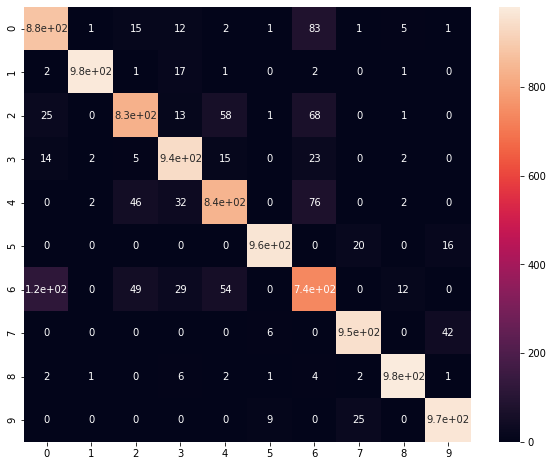

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

Text(0.5, 1.0, 'True label : 7 Prediction : 9')

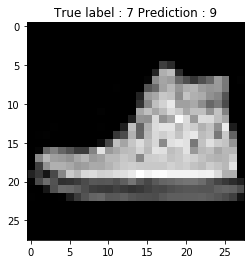

In [42]:
misclassified_idx = np.where(predictions != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title('True label : {} Prediction : {}'.format(y_test[i],predictions[i]))

 Label	Description
   - 0	    T-shirt/top
   - 1	    Trouser
   - 2	    Pullover
   - 3	    Dress
   - 4	    Coat
   - 5	    Sandal
   - 6	    Shirt
   - 7	    Sneaker
   - 8	    Bag
   - 9	    Ankle boot